In [22]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
os.getcwd()

'/home/pdoyle/workspace/simple_backtester/notebooks'

../grid_results3/spnasdaq_m125_v10_daily_state.json
../grid_results3/spnasdaq_m135_v10_daily_state.json
../grid_results3/spnasdaq_m130_v10_daily_state.json


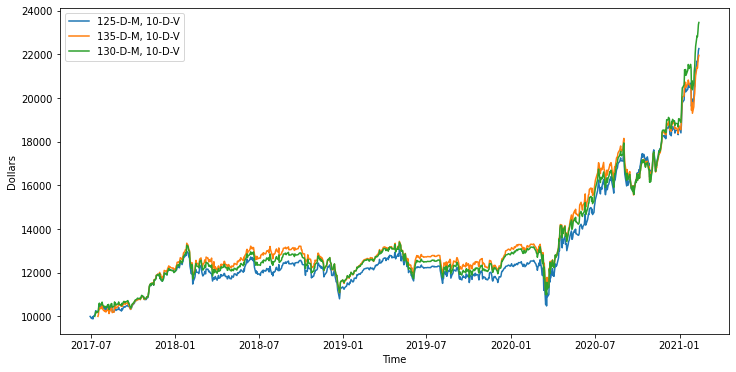

In [21]:
# grid search!
from glob import glob
import re

def backtest_metrics_grid(dict_list: list, m_list: list, v_list: list) -> None:
    # take in a list of labels as well.
    plt.figure(figsize=(12,6))
    plt.xlabel("Time")
    plt.ylabel("Dollars")
    
    for j, m, v in zip(dict_list, m_list, v_list):
        performance = [j[key]['total'] for key in j.keys()]
        times = [key for key in j.keys()]
        timeseries = pd.to_datetime(times)
        plt.plot(timeseries, performance, label=f"{m}-D-M, {v}-D-V")
    plt.legend()
    plt.show()
    
output_label = "spnasdaq"
results = glob(f"../grid_results3/{output_label}*_daily_state.json")
#ledger_csv = f"../grid_results/{output_label}*_ledger.csv"
#print(results)
daily_states = []
momentums = []
volatilities = []
for result in results:
    with open(result, "r") as f:
        states = json.load(f)
        total = states['2021-02-05 00:00:00']['total']
       # print(total)
    if total < 20000:
        continue
    print(result)
    m,v = result.split("_")[2:4]
    m = int(m[1:])
    v = int(v[1:])
    #if m != 14:
    #    continue
    momentums.append(m)
    volatilities.append(v)
    daily_states.append(states)
        
backtest_metrics_grid(daily_states, momentums, volatilities)

In [16]:
ledger = pd.read_csv(ledger_csv)
ledger.tax.sum()

11989.16652252

In [92]:
df = pd.read_csv("../results/grid_backtest_3_3.csv")
df['date'] = pd.to_datetime(df.date)
len(df)
day = pd.to_datetime("2018-01-10")
df.query("date == @day")

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,symbol,momentum,inv_volatility,action,weight,value,num_shares
2137,2018-01-10,423.510000,426.980000,408.450000,423.760000,423.760000,2043600.0,2043600.0,0.25,0.059,419.73000,"January 10, 18",0.000590,ISRG,1693921.324,27.650154,Action.hold,0.186139,5508,13
2138,2018-01-10,242.800000,244.000000,238.240000,242.590000,242.590000,982600.0,982600.0,-0.21,-0.086,241.61000,"January 10, 18",-0.000860,ILMN,308677.802,20.149570,Action.hold,0.135646,4124,17
2139,2018-01-10,79.250000,80.760000,78.900000,80.350000,NaN,6099589.0,6099589.0,0.44,0.551,80.02650,"Jan 10, 18",0.145729,ESRX,36657.523,36.972578,Action.hold,0.248897,7713,96
2140,2018-01-10,NaN,NaN,NaN,46.389999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STX,1407185.613,22.525059,Action.sell,NaN,3896,84
2141,2018-01-10,NaN,NaN,NaN,66.737999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TSLA,48267.865,19.996377,Action.sell,NaN,3470,52
2142,2018-01-10,78.099998,78.870003,77.010002,78.709999,70.598022,10150400.0,10150400.0,0.61,0.781,78.19667,"January 10, 18",0.007810,GILD,102644.646,33.735515,Action.buy,0.227105,7005,89
2143,2018-01-10,5.350000,5.580000,5.350000,5.560000,5.428929,54595100.0,54595100.0,0.21,3.925,5.49667,"January 10, 18",0.039250,SIRI,24618.085,30.037896,Action.buy,0.202213,6271,1128


In [14]:
btdf = pd.read_csv("../results/backtest.csv")
with open("../results/daily_state.json", "r") as f:
    state = json.load(f)

In [25]:
def backtest_metrics(dict_list: list) -> None:
    # take in a list of labels as well.
    plt.figure(figsize=(12,6))
    plt.xlabel("Time")
    plt.ylabel("Dollars")
    
    for j in dict_list:
        performance = [j[key]['total'] for key in j.keys()]
        times = [key for key in j.keys()]
        timeseries = pd.to_datetime(times)
        plt.plot(timeseries, performance, label="14-D M, 14-D, V")
    plt.legend()
    plt.show()

In [35]:
q = {k:v for k,v in better_drawdown.items() if pd.to_datetime(k) > pd.to_datetime('2020-02-01')}

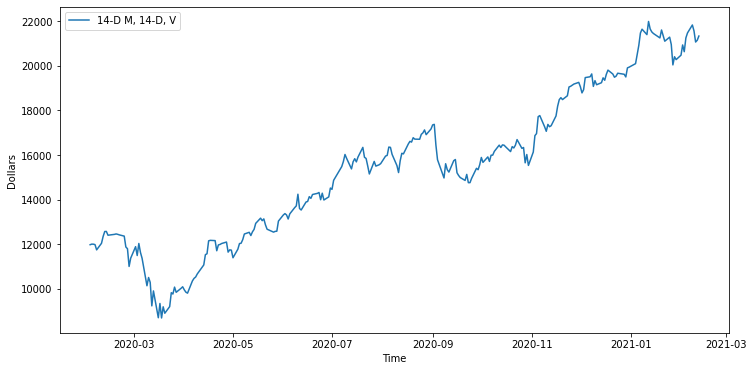

In [36]:
with open("../results/minmomentum40_daily_state.json", "r") as f:
    
    better_drawdown = json.load(f)
    
backtest_metrics([q])

In [61]:
# build in drawdown on a min momentum threshold then rerun.

In [89]:
performance[-1]

24614318.876874994

In [27]:
actions = pd.read_csv("../results/minmomentum40_backtest.csv")

In [40]:
qq = actions.query("date > '2020-03-01' and date < '2020-04-01'")

In [41]:
for i, row in qq.iterrows():
    print(row.date, row.momentum)

2020-03-02 1317.421
2020-03-02 263.243
2020-03-02 166.018
2020-03-02 146.286
2020-03-02 151.318
2020-03-03 1334.488
2020-03-03 260.026
2020-03-03 164.645
2020-03-03 147.448
2020-03-04 1349.08
2020-03-04 259.624
2020-03-04 164.359
2020-03-04 144.703
2020-03-05 1357.271
2020-03-05 257.869
2020-03-05 162.781
2020-03-05 139.634
2020-03-06 1362.697
2020-03-06 257.239
2020-03-06 161.028
2020-03-06 132.831
2020-03-09 1345.175
2020-03-09 250.387
2020-03-09 156.402
2020-03-09 120.717
2020-03-09 121.489
2020-03-10 1334.613
2020-03-10 245.184
2020-03-10 153.423
2020-03-10 123.943
2020-03-11 1316.023
2020-03-11 240.211
2020-03-11 148.913
2020-03-11 126.048
2020-03-12 1280.863
2020-03-12 227.086
2020-03-12 140.294
2020-03-12 126.717
2020-03-13 1238.946
2020-03-13 219.555
2020-03-13 136.306
2020-03-13 129.113
2020-03-16 1163.537
2020-03-16 205.252
2020-03-16 129.02
2020-03-16 123.251
2020-03-17 1086.91
2020-03-17 195.269
2020-03-17 131.298
2020-03-17 116.074
2020-03-18 989.522
2020-03-18 181.582
202